# Deskew and Scale

####  Goals
* Encode Categorical columns
* Deskew and scale all data
* Deal with outliers
* PCA

#### Output
* 
* 

In [1]:
cd ..

/home/jovyan/dsi/CAPSTONE


In [19]:
%run __init__.py
%matplotlib inline

In [3]:
commute_df = pd.read_pickle('./data/no_null_commute_df.pkl')
commute_df.head()

,Survey_Cycle,response_rate,num_employees,VMT_employee,goal_vmt,total_vmt,total_goal_vmt,ndat_rate,goal_ndat_rate_worksite_only,total_goal_ndat_trips,...,yearly_cost_meeting_program_requirements,yearly_cost_of_financial_incentives_subsidies_to_employees,yearly_cost_of_facilities,yearly_cost_other,explanation_of_other_cost,employer_applied_for_state_tax_credits_for_supporting_employee_commute_alternatives,What are your worksite's transportation program priorities for the next 6 months?1,What are your worksite's transportation program priorities for the next 6 months?2,What are your worksite's transportation program priorities for the next 6 months?3,UUID
0,2007/2008,73.2,183.0,7.0,5.7,763.0,625.66,42.8,48.8,264.5,...,0.0,0.0,0.0,0.0,NA,Unknown,Keep parking cost down,encourage orca use,encourage Pronto bike share,e1e2a498-0835-4381-a779-f8902903c9d7
1,2009/2010,73.0,240.0,6.6,5.7,1141.8,0.00,49.5,48.8,0.0,...,0.0,0.0,0.0,0.0,NA,Unknown,Keep parking cost down,encourage orca use,encourage Pronto bike share,e1e2a498-0835-4381-a779-f8902903c9d7
2,2011/2012,52.8,436.0,5.3,5.7,1219.0,0.00,66.7,48.8,0.0,...,0.0,0.0,0.0,0.0,NA,Unknown,Keep parking cost down,encourage orca use,encourage Pronto bike share,e1e2a498-0835-4381-a779-f8902903c9d7
3,2013/2014,72.2,650.0,5.2,5.7,2438.8,0.00,68.9,48.8,0.0,...,0.0,0.0,0.0,0.0,NA,Unknown,Keep parking cost down,encourage orca use,encourage Pronto bike share,e1e2a498-0835-4381-a779-f8902903c9d7
4,2009/2010,78.0,337.0,2.5,0.0,390.0,0.00,82.8,0.0,0.0,...,0.0,0.0,0.0,0.0,NA,Unknown,Audit current user program,Promote CTR program,NA,67cec626-a086-4690-be1b-3210972adc21


## 1. Encode Categorical

In [4]:
commute_dummies = pd.get_dummies(commute_df)
commute_dummies.head()

,response_rate,num_employees,VMT_employee,goal_vmt,total_vmt,total_goal_vmt,ndat_rate,goal_ndat_rate_worksite_only,total_goal_ndat_trips,total_annual_ghg_emissions_metric_tons_C02e,...,UUID_fa48e4d6-91ff-40e3-82c4-1f2b24dbc098,UUID_fba9f642-865c-4e83-afa8-b6e2da57a40e,UUID_fbd6981f-49c4-4e0a-be4f-6b3de9d032f0,UUID_fc4e2485-66ac-4047-8d55-d9cac950069b,UUID_fcc95ee4-833f-4a2c-8e82-2913b105fe31,UUID_fd077593-a7ac-43fd-85b2-9ee033540a11,UUID_fd5d438d-0ce3-4505-9729-8554797e30ab,UUID_fda44509-7249-4bf7-8352-a6e28edef591,UUID_ff564f49-75a4-4e5e-b881-daca4dde9319,UUID_ffb56ebc-e601-477b-9b6f-baf34d993739
0,73.2,183.0,7.0,5.7,763.0,625.66,42.8,48.8,264.5,284.4,...,0,0,0,0,0,0,0,0,0,0
1,73.0,240.0,6.6,5.7,1141.8,0.00,49.5,48.8,0.0,349.6,...,0,0,0,0,0,0,0,0,0,0
2,52.8,436.0,5.3,5.7,1219.0,0.00,66.7,48.8,0.0,515.1,...,0,0,0,0,0,0,0,0,0,0
3,72.2,650.0,5.2,5.7,2438.8,0.00,68.9,48.8,0.0,749.1,...,0,0,0,0,0,0,0,0,0,0
4,78.0,337.0,2.5,0.0,390.0,0.00,82.8,0.0,0.0,181.0,...,0,0,0,0,0,0,0,0,0,0


## 2. Deskew and Scale

In [5]:
mmscaler = MinMaxScaler((1E-9,1))

In [6]:
mmscaled_data = mmscaler.fit_transform(commute_dummies)

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.externals import six
from sklearn.externals.joblib import Parallel, delayed
from sklearn.utils.validation import FLOAT_DTYPES check_is_fitted

In [15]:
# from Josh's in class lecture using adult classification dataset
def _transform_selected(X, transform, selected="all", copy=True,
                        retain_ordering=False):
    """Apply a transform function to portion of selected features
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape [n_samples, n_features]
        Dense array or sparse matrix.
    transform : callable
        A callable transform(X) -> X_transformed
    copy : boolean, optional
        Copy X even if it could be avoided.
    selected : "all" or array of indices or mask
        Specify which features to apply the transform to.
    retain_ordering : boolean, default False
        Specify whether the initial order of features has
        to be maintained in the output
    Returns
    -------
    X : array or sparse matrix, shape=(n_samples, n_features_new)
    """
    X = check_array(X, accept_sparse='csc', copy=copy, dtype=FLOAT_DTYPES)

    if isinstance(selected, six.string_types) and selected == "all":
        return transform(X)

    if len(selected) == 0:
        return X

    n_features = X.shape[1]
    ind = np.arange(n_features)
    sel = np.zeros(n_features, dtype=bool)
    sel[np.asarray(selected)] = True
    not_sel = np.logical_not(sel)
    n_selected = np.sum(sel)

    if n_selected == 0:
        # No features selected.
        return X
    elif n_selected == n_features:
        # All features selected.
        return transform(X)
    else:
        X_sel = transform(X[:, ind[sel]])
        X_not_sel = X[:, ind[not_sel]]

        if retain_ordering:
            # As of now, X is expected to be dense array
            X[:, ind[sel]] = X_sel
            return X
        if sparse.issparse(X_sel) or sparse.issparse(X_not_sel):
            return sparse.hstack((X_sel, X_not_sel))
        else:
            return np.hstack((X_sel, X_not_sel))

def _boxcox(X, i, lambda_x=None):
    x = X[:, i]
    if lambda_x is None:
        x, lambda_x = stats.boxcox(x, lambda_x)
        return x, lambda_x
    else:
        x = stats.boxcox(x, lambda_x)
        return x


def boxcox(X, copy=True):
    """BoxCox transform to the input data
    Apply boxcox transform on individual features with lambda
    that maximizes the log-likelihood function for each feature
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        The data to be transformed. Should contain only positive data.
    copy : boolean, optional, default=True
        Set to False to perform inplace transformation and avoid a
        copy (if the input is already a numpy array or a scipy.sparse
        CSR matrix and if axis is 1).
    Returns
    -------
    X_tr : array-like, shape (n_samples, n_features)
        The transformed data.
    References
    ----------
    G.E.P. Box and D.R. Cox, "An Analysis of Transformations", Journal of the
    Royal Statistical Society B, 26, 211-252 (1964).
    """
    X = check_array(X, ensure_2d=True, dtype=FLOAT_DTYPES, copy=copy)
    if np.any(X <= 0):
        raise ValueError("BoxCox transform can only be applied "
                         "on positive data")
    n_features = X.shape[1]
    outputs = Parallel(n_jobs=-1)(delayed(_boxcox)(X, i, lambda_x=None)
                                  for i in range(n_features))
    output = np.concatenate([o[0][..., np.newaxis] for o in outputs], axis=1)
    return output


class BoxCoxTransformer(BaseEstimator, TransformerMixin):
    """BoxCox transformation on individual features.
    Boxcox transform wil be applied on each feature (each column of
    the data matrix) with lambda evaluated to maximise the log-likelihood
    Parameters
    ----------
    transformed_features : "all" or array of indices or mask
        Specify what features are to be transformed.
        - "all" (default): All features are to be transformed.
        - array of int: Array of feature indices to be transformed..
        - mask: Array of length n_features and with dtype=bool.
    copy : boolean, optional, default=True
        Set to False to perform inplace computation.
    Attributes
    ----------
    transformed_features_ : array of int
        The indices of the features to be transformed
    lambdas_ : array of float, shape (n_transformed_features,)
        The parameters of the BoxCox transform for the selected features.
    n_features_ : int
        Number of features in input during fit
    Notes
    -----
    The Box-Cox transform is given by::
        y = (x ** lmbda - 1.) / lmbda,  for lmbda > 0
            log(x),                     for lmbda = 0
    ``boxcox`` requires the input data to be positive.
    """
    def __init__(self, transformed_features="all", n_jobs=1, copy=True):
        self.transformed_features = transformed_features
        self.n_jobs = n_jobs
        self.copy = copy

    def fit(self, X, y=None):
        """Estimate lambda for each feature to maximise log-likelihood
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to fit by apply boxcox transform,
            to each of the features and learn the lambda.
        y : ignored
        Returns
        -------
        self : object
            Returns self.
        """
        X = check_array(X, ensure_2d=True, dtype=FLOAT_DTYPES)
        self.n_features_ = X.shape[1]
        if self.transformed_features is "all":
            self.transformed_features_ = np.arange(self.n_features_)
        else:
            self.transformed_features_ = np.copy(self.transformed_features)
            if self.transformed_features_.dtype == np.bool:
                self.transformed_features_ = \
                    np.where(self.transformed_features_)[0]
        if np.any(X[:, self.transformed_features_] <= 0):
            raise ValueError("BoxCox transform can only be applied "
                             "on positive data")
        out = Parallel(n_jobs=self.n_jobs)(delayed(_boxcox)(X, i,
                                           lambda_x=None)
                                           for i in self.transformed_features_)
        self.lambdas_ = np.array([o[1] for o in out])
        return self

    def transform(self, X):
        """Transform each feature using the lambdas evaluated during fit time
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The data to apply boxcox transform.
        Returns
        -------
        X_tr : array-like, shape (n_samples, n_features)
            The transformed data.
        """
        X = check_array(X, ensure_2d=True, dtype=FLOAT_DTYPES, copy=self.copy)
        if any(np.any(X[:, self.transformed_features_] <= 0, axis=0)):
            raise ValueError("BoxCox transform can only be applied "
                             "on positive data")
        if X.shape[1] != self.n_features_:
            raise ValueError("X has a different shape than during fitting.")
        X_tr = _transform_selected(X, self._transform,
                                   self.transformed_features_,
                                   copy=False, retain_ordering=True)
        return X_tr

    def _transform(self, X):
        outputs = Parallel(n_jobs=self.n_jobs)(
            delayed(_boxcox)(X, i, self.lambdas_[i])
            for i in range(len(self.transformed_features_)))
        output = np.concatenate([o[..., np.newaxis] for o in outputs], axis=1)
        return output

    def inverse_transform(self, X):
        """Inverse transform each feature using the lambdas evaluated during fit time
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The transformed data after boxcox transform.
        Returns
        -------
        X_inv : array-like, shape (n_samples, n_features)
            The original data.
        Notes
        -----
        The inverse Box-Cox transform is given by::
        y = log(x * lmbda + 1.) / lmbda,  for lmbda > 0
            exp(x),                       for lmbda = 0
        """

        X = check_array(X, ensure_2d=True, dtype=FLOAT_DTYPES, copy=self.copy)
        if X.shape[1] != self.n_features_:
            raise ValueError("X has a different shape than during fitting.")
        X_inv = _transform_selected(X, self._inverse_transform,
                                    self.transformed_features_, copy=False,
                                    retain_ordering=True)
        return X_inv

    def _inverse_transform(self, X):
        X_inv = X.copy()

        mask = self.lambdas_ != 0
        mask_lambdas = self.lambdas_[mask]
        Xinv_mask = X_inv[:, mask]
        Xinv_mask *= mask_lambdas
        np.log1p(Xinv_mask, out=Xinv_mask)
        Xinv_mask /= mask_lambdas
        np.exp(Xinv_mask, out=Xinv_mask)
        X_inv[:, mask] = Xinv_mask

        mask = self.lambdas_ == 0
        X_inv[:, mask] = np.exp(X_inv[:, mask])
        return X_inv


In [16]:
boxcox = BoxCoxTransformer()

In [17]:
commute_deskew = boxcox.fit_transform(mmscaled_data)

/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))


In [18]:
ss = StandardScaler()
commute_scaled = ss.fit_transform(commute_deskew)

## 3. Outliers

In [ ]:
commute_num_df = (adult_train_standardize_num_df
                      .select_dtypes(['int64']))
commute_num_df.head()

In [42]:
commute_sc_df = pd.DataFrame(commute_scaled, columns=commute_dummies.columns)
commute_sc_df.head()

,response_rate,num_employees,VMT_employee,goal_vmt,total_vmt,total_goal_vmt,ndat_rate,goal_ndat_rate_worksite_only,total_goal_ndat_trips,total_annual_ghg_emissions_metric_tons_C02e,...,UUID_fa48e4d6-91ff-40e3-82c4-1f2b24dbc098,UUID_fba9f642-865c-4e83-afa8-b6e2da57a40e,UUID_fbd6981f-49c4-4e0a-be4f-6b3de9d032f0,UUID_fc4e2485-66ac-4047-8d55-d9cac950069b,UUID_fcc95ee4-833f-4a2c-8e82-2913b105fe31,UUID_fd077593-a7ac-43fd-85b2-9ee033540a11,UUID_fd5d438d-0ce3-4505-9729-8554797e30ab,UUID_fda44509-7249-4bf7-8352-a6e28edef591,UUID_ff564f49-75a4-4e5e-b881-daca4dde9319,UUID_ffb56ebc-e601-477b-9b6f-baf34d993739
0,-0.350845,-0.704713,0.339845,0.484118,-0.383114,2.194139,-0.889917,0.341516,2.193031,-0.302990,...,-0.069438,-0.053734,-0.0,-0.062077,-0.069438,-0.069438,-0.069438,-0.120854,-0.069438,-0.062077
1,-0.367982,-0.376462,0.244132,0.484118,-0.031887,-0.455429,-0.579419,0.341516,-0.455429,-0.129010,...,-0.069438,-0.053734,-0.0,-0.062077,-0.069438,-0.069438,-0.069438,-0.120854,-0.069438,-0.062077
2,-1.902074,0.289916,-0.100890,0.484118,0.025371,-0.455429,0.237806,0.341516,-0.455429,0.201284,...,-0.069438,-0.053734,-0.0,-0.062077,-0.069438,-0.069438,-0.069438,-0.120854,-0.069438,-0.062077
3,-0.436165,0.716923,-0.130040,0.484118,0.642901,-0.455429,0.344107,0.341516,-0.455429,0.526929,...,-0.069438,-0.053734,-0.0,-0.062077,-0.069438,-0.069438,-0.069438,-0.120854,-0.069438,-0.062077
4,0.071162,0.008621,-1.184500,-2.033083,-0.976399,-0.455429,1.023551,-2.067110,-0.455429,-0.682437,...,-0.069438,-0.053734,-0.0,-0.062077,-0.069438,-0.069438,-0.069438,-0.120854,-0.069438,-0.062077


In [49]:
commute_sc_no_uuid_df = commute_sc_df.drop([col for col in commute_sc_df.columns if 'UUID' in col], axis=1)

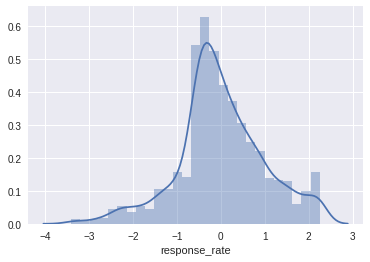

In [43]:
sns.distplot(commute_sc_df['response_rate'])

In [50]:
len(commute_sc_no_uuid_df.columns)

1201

In [ ]:
fig = plt.figure(figsize=(50,250))
# plt.title('Numerical Features', size=40)

for i, col in enumerate(commute_sc_no_uuid_df.columns):
    fig.add_subplot(30,2,1+i)
    sns.distplot(commute_sc_no_uuid_df[col])
    plt.xlabel(num_col, size=30)
    
    mean_value = commute_sc_df[col].mean()
    plt.axvline(mean_value, c='red')
    
    median_value = commute_sc_no_uuid_df[col].median()
    plt.axvline(median_value, c='black')
    
plt.tight_layout()
# plt.savefig('./figures/numerical_subplots.png')
# plt.savefig('./figures/numerical_subplots.pdf')


## 4. PCA

In [20]:
pca = PCA(n_components=5)

In [30]:
commute_pca = pca.fit_transform(commute_scaled)

pca.components_
pca.explained_variance_ratio_

array([ 0.03026864,  0.01769735,  0.01281693,  0.01019827,  0.00928955])

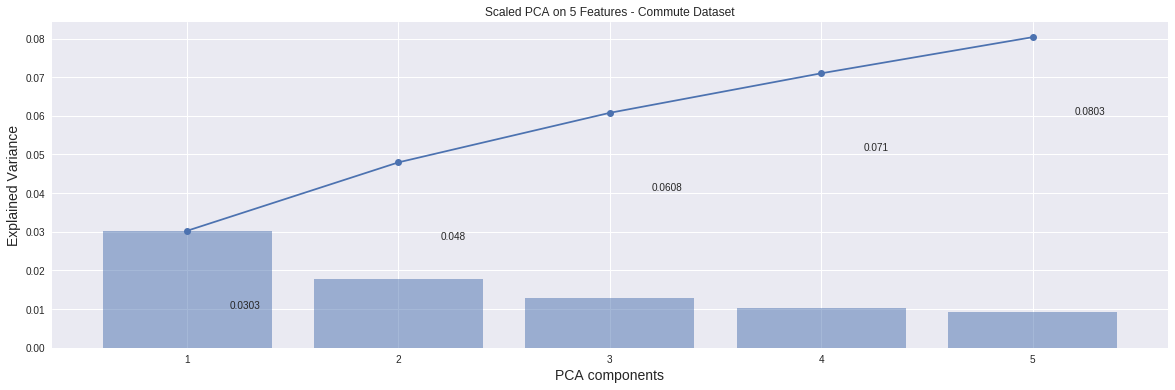

In [28]:
fig = plt.figure(figsize=(20,6))

x = np.arange(1,6)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x, cumulative_explained_variance,'-o')
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))

plt.xlabel('PCA components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Scaled PCA on 5 Features - Commute Dataset')
plt.show()
plt.savefig('./figures/Scaled PCA on 5 Features - Commute Dataset.pdf')

In [33]:
X_pca_df = pd.DataFrame(commute_pca)

### Pickling

In [52]:
commute_dummies.to_pickle('./data/commute_dummies_df.pkl')

In [54]:
commute_scaled.dump('./data/commute_scaled.pkl')